Modelos predictivos - Sistema de Recomendación Telecom 2021

Generación de dataset

In [1]:
import pandas as pd
df_metadata = pd.read_csv(r"C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\Dummie_Metadata.csv",
                         index_col = 1)
df_metadata.head(10)

,Unnamed: 0,content_id,show_type,released_year,country_of_origin,run_time_min,pay_per_view,pack_premium_1,pack_premium_2,category_Acción,...,keywords_Taquilleras.9,keywords_90s.10,keywords_De Libros.9,keywords_Pobreza.8,keywords_Sociedad.8,keywords_De Libros.10,keywords_Sociedad.9,audience_General,audience_Juvenil,audience_Niños
asset_id,,,,,,,,,,,,,,,,,,,,,
15188,0,0,Serie,2012,AR,48,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24940,1,1,Película,2012,Others,105,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21939,2,2,Película,2016,Others,82,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9005,3,3,Película,2017,Others,99,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7391,4,4,Película,2009,US,126,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17760,5,5,TV,2017,US,44,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3619,6,6,Serie,2019,GB,59,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2472,7,7,TV,2019,AR,182,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5066,8,6,Serie,2019,GB,58,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [2]:
#Drop manual index in csv
df_metadata.drop('Unnamed: 0', axis=1, inplace=True)
#Drop run time (because we included in new train file)
df_metadata.drop('run_time_min', axis=1, inplace=True)
#Asume that all the contents to asset contain same features
df_metadata.drop('content_id', axis=1, inplace=True)

In [3]:
#By business reqirements, show type "Others" is not necesary because contains product tutorials
without_tutorials = df_metadata['show_type'] != "Others"
df_metadata = df_metadata[without_tutorials]
df_metadata

,show_type,released_year,country_of_origin,pay_per_view,pack_premium_1,pack_premium_2,category_Acción,category_Animación,category_Aventura,category_Biografía,...,keywords_Taquilleras.9,keywords_90s.10,keywords_De Libros.9,keywords_Pobreza.8,keywords_Sociedad.8,keywords_De Libros.10,keywords_Sociedad.9,audience_General,audience_Juvenil,audience_Niños
asset_id,,,,,,,,,,,,,,,,,,,,,
15188,Serie,2012,AR,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24940,Película,2012,Others,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21939,Película,2016,Others,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9005,Película,2017,Others,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7391,Película,2009,US,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3683,Serie,2021,US,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16810,Serie,2021,US,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20468,TV,2011,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='count', ylabel='show_type'>

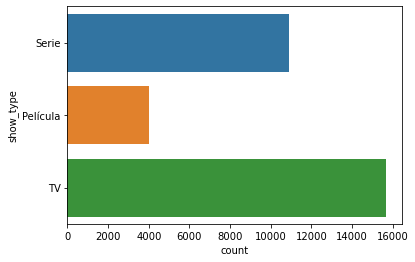

In [4]:
import seaborn as sns
sns.countplot(y='show_type', data=df_metadata)

In [5]:
df_train = pd.read_csv(r"C:\Users\MegaTecnologia\Desktop\DesafioTelecom\Data\train_w_target.csv")
df_train.head(10)

,Unnamed: 0,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume,minVisualizados,run_time_min,target
0,0,0,90627,STATIONARY,18332,2021-02-18 22:52:00,2021-02-18 23:35:00,0,43,43,1
1,1,3,3389,CLOUD_CLIENT,18332,2021-02-27 16:25:00,2021-02-27 17:05:00,0,40,43,1
2,2,11,3395,STATIONARY,18332,2021-02-24 17:24:00,2021-02-24 18:10:00,0,46,43,1
3,3,13,26042,PHONE,18332,2021-02-24 21:56:00,2021-02-24 22:44:00,0,48,43,1
4,4,35,26060,STB,18332,2021-02-19 15:10:00,2021-02-19 15:15:00,1,5,43,0
5,5,37,26062,STATIONARY,18332,2021-03-09 22:55:00,2021-03-09 23:38:00,0,43,43,1
6,6,37,26062,CLOUD_CLIENT,18332,2021-03-21 17:56:00,2021-03-21 19:13:00,0,77,43,1
7,7,40,26065,STB,18332,2021-03-06 01:49:00,2021-03-06 02:31:00,0,42,43,1
8,8,40,26065,STB,18332,2021-03-07 13:38:00,2021-03-07 14:53:00,0,75,43,1
9,9,40,26065,STB,18332,2021-03-14 15:49:00,2021-03-14 15:55:00,1,6,43,0


In [6]:
#Drop useless data
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_train.drop('customer_id', axis=1, inplace=True)
df_train.drop('device_type', axis=1, inplace=True)
df_train.drop('tunein', axis=1, inplace=True)
df_train.drop('tuneout', axis=1, inplace=True)
df_train.drop('resume', axis=1, inplace=True)
df_train.drop('minVisualizados', axis=1, inplace=True)
df_train.drop('run_time_min', axis=1, inplace=True)
df_train

,account_id,asset_id,target
0,90627,18332,1
1,3389,18332,1
2,3395,18332,1
3,26042,18332,1
4,26060,18332,0
...,...,...,...
3657745,25640,15863,0
3657746,25640,15598,1
3657747,25640,22513,1
3657748,25777,24720,0


#Merge the two DF in one 
df = pd.merge(df_train,df_metadata, how='inner',on ='asset_id')
df

No se puede hacer el merge por el espacio en memoria que requiriría

Reglas de asociación

df_dummies = pd.get_dummies(df_train, prefix="Content", columns= {"asset_id"})
df_dummies

No se puede tampoco encarar el algoritmo a priori por el espacio en memoria.

In [8]:
df_metadata.describe()

,released_year,pay_per_view,pack_premium_1,pack_premium_2,category_Acción,category_Animación,category_Aventura,category_Biografía,category_Ciencia Ficción,category_Comedia,...,keywords_Taquilleras.9,keywords_90s.10,keywords_De Libros.9,keywords_Pobreza.8,keywords_Sociedad.8,keywords_De Libros.10,keywords_Sociedad.9,audience_General,audience_Juvenil,audience_Niños
count,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,...,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000,30614.000000
mean,2015.794016,0.027863,0.073332,0.062912,0.050565,0.000719,0.005684,0.000261,0.004344,0.140295,...,0.000065,0.000033,0.000033,0.000033,0.000033,0.000033,0.000033,0.645228,0.278729,0.076044
std,6.207407,0.164583,0.260686,0.242809,0.219111,0.026798,0.075177,0.016163,0.065770,0.347299,...,0.008083,0.005715,0.005715,0.005715,0.005715,0.005715,0.005715,0.478452,0.448381,0.265072
min,1942.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Encoder strings values
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
df_metadata['show_type'] = encoder.fit_transform(df_metadata['show_type'])
df_metadata['country_of_origin'] = encoder.fit_transform(df_metadata['country_of_origin'])

In [10]:
#Para estandarizar características. Utilizaremos el módulo StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentacion_std = scaler.fit_transform(df_metadata)

In [11]:
from sklearn.decomposition import PCA

pca = PCA()

In [12]:
pca.fit(segmentacion_std)

PCA()

In [13]:
pca.explained_variance_ratio_

array([4.33571429e-03, 3.95563174e-03, 3.93991574e-03, ...,
       5.63921998e-36, 3.36555128e-36, 2.39939160e-37])

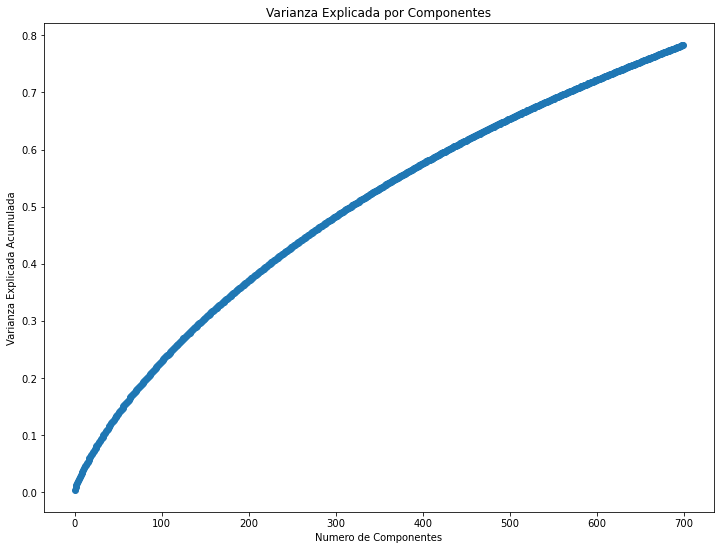

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.plot(range(0,700), pca.explained_variance_ratio_[0:700].cumsum(), marker = 'o', linestyle = '--')
plt.title('Varianza Explicada por Componentes')
plt.xlabel('Numero de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.show()

In [15]:
pca.explained_variance_ratio_[0:650].cumsum()

array([0.00433571, 0.00829135, 0.01223126, 0.01589319, 0.01939518,
       0.02283995, 0.02616459, 0.02943759, 0.03259012, 0.03571398,
       0.03879601, 0.04181177, 0.04480037, 0.0477402 , 0.05062806,
       0.05347895, 0.05629998, 0.05905826, 0.06177402, 0.06444111,
       0.06704821, 0.06962229, 0.0721844 , 0.07474081, 0.07729325,
       0.07982092, 0.08233598, 0.08484469, 0.08731981, 0.08978254,
       0.09224152, 0.09466663, 0.09706344, 0.09945138, 0.10182989,
       0.10419976, 0.1065609 , 0.10888983, 0.11118642, 0.11346902,
       0.11573503, 0.11796588, 0.12017872, 0.12238896, 0.1245934 ,
       0.12677545, 0.12895615, 0.13112644, 0.13329184, 0.13543968,
       0.13756761, 0.13968478, 0.14179746, 0.14390122, 0.14598455,
       0.1480487 , 0.1501046 , 0.15214591, 0.15418043, 0.15619941,
       0.15818017, 0.16015236, 0.16211135, 0.16404869, 0.16598154,
       0.16790681, 0.16979679, 0.17167856, 0.17355494, 0.17541804,
       0.17727414, 0.1791176 , 0.18094139, 0.18276193, 0.18457

In [16]:
pca = PCA(n_components=650)
pca.fit(segmentacion_std)

PCA(n_components=650)

In [17]:
pca.explained_variance_ratio_

array([0.00433571, 0.00395563, 0.00393992, 0.00366192, 0.00350199,
       0.00344477, 0.00332464, 0.003273  , 0.00315253, 0.00312385,
       0.00308203, 0.00301577, 0.00298859, 0.00293983, 0.00288786,
       0.00285089, 0.00282103, 0.00275827, 0.00271575, 0.00266709,
       0.0026071 , 0.00257407, 0.0025621 , 0.00255641, 0.00255243,
       0.00252767, 0.00251505, 0.0025087 , 0.00247511, 0.00246273,
       0.00245897, 0.00242509, 0.00239681, 0.00238794, 0.0023785 ,
       0.00236986, 0.00236113, 0.00232892, 0.00229658, 0.00228259,
       0.002266  , 0.00223083, 0.00221283, 0.00221023, 0.00220442,
       0.00218204, 0.00218068, 0.00217027, 0.00216537, 0.00214783,
       0.00212791, 0.00211715, 0.00211266, 0.00210374, 0.00208331,
       0.00206412, 0.00205586, 0.00204129, 0.00203449, 0.00201896,
       0.00198073, 0.00197216, 0.00195895, 0.00193731, 0.0019328 ,
       0.00192524, 0.00188993, 0.00188172, 0.00187633, 0.00186305,
       0.00185606, 0.00184341, 0.00182372, 0.00182047, 0.00181

In [18]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                          columns=df_metadata.columns.values,
                          index= range(0,650))
df_pca_comp

,show_type,released_year,country_of_origin,pay_per_view,pack_premium_1,pack_premium_2,category_Acción,category_Animación,category_Aventura,category_Biografía,...,keywords_Taquilleras.9,keywords_90s.10,keywords_De Libros.9,keywords_Pobreza.8,keywords_Sociedad.8,keywords_De Libros.10,keywords_Sociedad.9,audience_General,audience_Juvenil,audience_Niños
0,-0.233704,-0.047429,-0.053816,0.037654,0.117682,0.070551,0.104477,-0.001349,0.016435,0.003499,...,0.009826,0.033161,0.012507,0.014338,0.014153,0.033161,0.014338,0.283772,-0.217376,-0.144503
1,0.000368,-0.019829,0.060770,0.006578,0.036070,0.001433,0.042162,0.001657,0.006185,0.001102,...,0.003950,0.359005,0.037963,-0.002538,0.056299,0.359005,-0.002538,-0.030265,0.020598,0.019786
2,0.033314,0.042881,-0.138503,-0.020658,-0.141532,-0.027393,-0.174554,-0.003648,-0.019242,-0.000380,...,-0.005816,0.120238,0.008269,0.003635,0.020820,0.120238,0.003635,0.012919,-0.004124,-0.016343
3,0.027286,0.009788,0.003221,-0.017049,0.031025,-0.033878,0.056233,-0.000367,-0.008854,-0.002841,...,-0.007815,0.023222,-0.006077,-0.008655,-0.000902,0.023222,-0.008655,-0.078989,0.063868,0.034539
4,-0.110645,-0.149264,0.172991,0.038978,0.021938,0.128493,0.027957,0.009076,0.037534,-0.001041,...,0.011648,-0.006945,0.013711,0.014706,0.006022,-0.006945,0.014706,-0.110249,0.090408,0.046070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.006473,-0.009402,0.004431,-0.022425,0.001243,0.014165,-0.012405,-0.011856,0.016598,-0.020562,...,-0.009120,0.000350,-0.001500,0.008657,0.001358,0.000350,0.008657,-0.008315,0.004296,0.007741
646,-0.016797,0.003612,0.008121,-0.004256,0.007995,-0.018726,-0.001528,-0.001820,-0.013694,-0.029020,...,0.010920,0.002826,0.011464,-0.006919,0.003424,0.002826,-0.006919,-0.009050,0.005464,0.007092
647,-0.006165,0.000397,-0.015345,0.010327,-0.007980,0.017011,-0.026609,0.004707,0.011121,0.037334,...,0.016357,0.000145,0.000617,0.001151,0.001684,0.000145,0.001151,-0.006448,0.026411,-0.033037
648,-0.001588,0.035529,0.001201,-0.004662,0.007846,0.001714,-0.014354,0.001320,0.008132,0.007406,...,0.032104,0.001355,-0.002412,-0.000718,-0.001310,0.001355,-0.000718,-0.006636,-0.005089,0.020586


In [19]:
scores_pca = pca.transform(segmentacion_std)

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,50):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

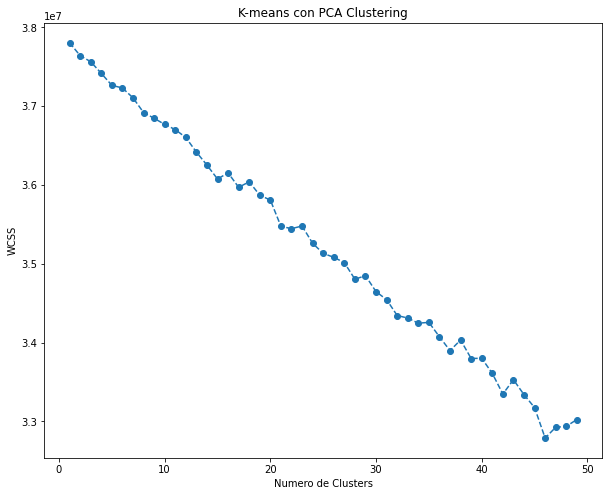

In [21]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.title('K-means con PCA Clustering')
plt.show()